In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nbconvert
%matplotlib inline
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from pandas_datareader import DataReader
from dotenv import load_dotenv

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score, roc_curve
from collections import Counter
from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier, plot_importance, plot_tree


In [4]:
from datetime import datetime as dt
from datetime import timedelta
from backtesting import Strategy, Backtest

C:\Users\beaur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\backtesting\_plotting.py:55: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support, such as old IDEs. Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [5]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
ticker= 'META'

META = yf.Ticker(ticker).history(period = '6y')
META = pd.DataFrame(META)

META.rename(columns={'Close': 'META Close', 'Open': 'META Open', 'High': 'META High', 'Low': 'META Low', 'Volume': 'META Volume', 'Dividends': 'META Dividends', 'Stock Splits': 'META Stock Splits'}, inplace=True)
META = META.reset_index()
META['Date'] = pd.to_datetime(META['Date'])

META = META.loc[(META['Date'] >= '2020-09-30') & (META['Date'] <= '2024-12-31')]

META


,Date,META Open,META High,META Low,META Close,META Volume,META Dividends,META Stock Splits
198,2020-09-30 00:00:00-04:00,260.162683,264.234218,258.295720,260.083221,20142500,0.0,0.0
199,2020-10-01 00:00:00-04:00,263.509337,266.468646,262.963134,264.780457,20009800,0.0,0.0
200,2020-10-02 00:00:00-04:00,259.397989,263.310660,257.382073,258.136810,16367600,0.0,0.0
201,2020-10-05 00:00:00-04:00,260.381131,263.032593,259.030550,262.814117,12822300,0.0,0.0
202,2020-10-06 00:00:00-04:00,259.964044,263.846924,256.448592,256.865692,18696900,0.0,0.0
...,...,...,...,...,...,...,...,...
1263,2024-12-24 00:00:00-05:00,600.825321,606.078774,597.396193,605.839539,4726100,0.0,0.0
1264,2024-12-26 00:00:00-05:00,603.576678,604.394108,597.057259,601.453369,6081400,0.0,0.0
1265,2024-12-27 00:00:00-05:00,597.525794,599.958126,587.946016,597.924561,8084200,0.0,0.0
1266,2024-12-30 00:00:00-05:00,586.899246,595.063503,583.739228,589.381409,7025900,0.0,0.0


In [8]:
ticker = 'NVDA'

NVDA = yf.Ticker(ticker).history(period = '6y')
NVDA = pd.DataFrame(NVDA)

NVDA.rename(columns={'Close': 'NVDA Close', 'Open': 'NVDA Open', 'High': 'NVDA High', 'Low': 'NVDA Low', 'Volume': 'NVDA Volume', 'Dividends': 'NVDA Dividends', 'Stock Splits': 'NVDA Stock Splits'}, inplace=True)

NVDA = NVDA.reset_index()
NVDA['Date'] = pd.to_datetime(NVDA['Date'])

NVDA = NVDA.loc[(NVDA['Date'] >= '2020-09-30') & (NVDA['Date'] <= '2024-12-31')]

NVDA

,Date,NVDA Open,NVDA High,NVDA Low,NVDA Close,NVDA Volume,NVDA Dividends,NVDA Stock Splits
205,2020-09-30 00:00:00-04:00,13.116727,13.580286,13.109500,13.488571,689184000,0.0,0.0
206,2020-10-01 00:00:00-04:00,13.715365,13.720100,13.419036,13.572309,525004000,0.0,0.0
207,2020-10-02 00:00:00-04:00,13.184018,13.477605,13.010557,13.021772,552496000,0.0,0.0
208,2020-10-05 00:00:00-04:00,13.194984,13.601969,13.181775,13.600224,479820000,0.0,0.0
209,2020-10-06 00:00:00-04:00,13.787144,14.098177,13.622655,13.693933,784420000,0.0,0.0
...,...,...,...,...,...,...,...,...
1270,2024-12-24 00:00:00-05:00,139.961730,141.861205,138.612093,140.181671,105157000,0.0,0.0
1271,2024-12-26 00:00:00-05:00,139.661806,140.811501,137.692343,139.891739,116205600,0.0,0.0
1272,2024-12-27 00:00:00-05:00,138.512122,138.981994,134.673175,136.972534,170582600,0.0,0.0
1273,2024-12-30 00:00:00-05:00,134.793117,140.231631,133.983341,137.452393,167734700,0.0,0.0


In [9]:
ticker = 'PLTR'

PLTR = yf.Ticker(ticker).history(period = '6y')
PLTR = pd.DataFrame(PLTR)

PLTR.rename(columns={'Close': 'PLTR Close', 'Open': 'PLTR Open', 'High': 'PLTR High', 'Low': 'PLTR Low', 'Volume': 'PLTR Volume', 'Dividends': 'PLTR Dividends', 'Stock Splits': 'PLTR Stock Splits'}, inplace=True)

PLTR = PLTR.reset_index()
PLTR['Date'] = pd.to_datetime(PLTR['Date'])

PLTR = PLTR.loc[(PLTR['Date'] >= '2020-09-30') & (PLTR['Date'] <= '2024-12-31')]

PLTR

,Date,PLTR Open,PLTR High,PLTR Low,PLTR Close,PLTR Volume,PLTR Dividends,PLTR Stock Splits
0,2020-09-30 00:00:00-04:00,10.000000,11.410000,9.110000,9.500000,338584400,0.0,0.0
1,2020-10-01 00:00:00-04:00,9.690000,10.100000,9.230000,9.460000,124297600,0.0,0.0
2,2020-10-02 00:00:00-04:00,9.060000,9.280000,8.940000,9.200000,55018300,0.0,0.0
3,2020-10-05 00:00:00-04:00,9.430000,9.490000,8.920000,9.030000,36316900,0.0,0.0
4,2020-10-06 00:00:00-04:00,9.040000,10.180000,8.900000,9.900000,90864000,0.0,0.0
...,...,...,...,...,...,...,...,...
1065,2024-12-24 00:00:00-05:00,81.089996,84.796997,81.000000,82.379997,64983300,0.0,0.0
1066,2024-12-26 00:00:00-05:00,83.160004,83.489998,81.300003,82.139999,60377100,0.0,0.0
1067,2024-12-27 00:00:00-05:00,81.419998,82.000000,77.930000,79.080002,66975900,0.0,0.0
1068,2024-12-30 00:00:00-05:00,77.040001,79.239998,76.110001,77.180000,60850900,0.0,0.0


In [10]:
ticker = 'MU'

MU = yf.Ticker(ticker).history(period = '6y')
MU.rename(columns={'Close': 'MU Close', 'Open': 'MU Open', 'High': 'MU High', 'Low': 'MU Low', 'Volume': 'MU Volume', 'Dividends': 'MU Dividends', 'Stock Splits': 'MU Stock  Splits'}, inplace=True)

MU.index = pd.to_datetime(MU.index, format='%Y%m%d')
MU = pd.DataFrame(MU)

MU = MU.reset_index()
MU['Date'] = pd.to_datetime(MU['Date'])

MU = MU.loc[(MU['Date'] >= '2020-09-30') & (MU['Date'] <= '2024-12-31')]

MU

,Date,MU Open,MU High,MU Low,MU Close,MU Volume,MU Dividends,MU Stock Splits
205,2020-09-30 00:00:00-04:00,47.779649,48.091998,45.710338,45.837227,55392600,0.000,0.0
206,2020-10-01 00:00:00-04:00,45.973886,47.028066,45.925082,46.774281,24460000,0.000,0.0
207,2020-10-02 00:00:00-04:00,45.739624,46.383844,45.388231,45.437035,20277500,0.000,0.0
208,2020-10-05 00:00:00-04:00,45.866509,46.588815,45.856746,46.461922,16933700,0.000,0.0
209,2020-10-06 00:00:00-04:00,46.413126,47.662525,46.091018,46.188625,17926200,0.000,0.0
...,...,...,...,...,...,...,...,...
1270,2024-12-24 00:00:00-05:00,89.207546,89.327042,87.863161,88.908791,13021300,0.000,0.0
1271,2024-12-26 00:00:00-05:00,88.132045,90.253186,87.733706,89.446556,14468200,0.000,0.0
1272,2024-12-27 00:00:00-05:00,88.629962,89.117922,87.215868,88.261497,19422600,0.000,0.0
1273,2024-12-30 00:00:00-05:00,86.740870,86.800704,84.337776,85.065681,22022900,0.115,0.0


In [11]:
ticker = 'MSFT'

MSFT = yf.Ticker(ticker).history(period = '6y')
MSFT = pd.DataFrame(MSFT)

MSFT.rename(columns={'Close': 'MSFT Close', 'Open': 'MSFT Open', 'High': 'MSFT High', 'Low': 'MSFT Low', 'Volume': 'MSFT Volume', 'Dividends': 'MSFT Dividends', 'Stock Splits': 'MSFT Stock'}, inplace=True)

MSFT = MSFT.reset_index()
MSFT['Date'] = pd.to_datetime(MSFT['Date'])

MSFT = MSFT.loc[(MSFT['Date'] >= '2020-09-30') & (MSFT['Date'] <= '2024-12-31')]

MSFT

,Date,MSFT Open,MSFT High,MSFT Low,MSFT Close,MSFT Volume,MSFT Dividends,MSFT Stock
205,2020-09-30 00:00:00-04:00,198.804705,202.872100,197.665832,201.292999,33829100,0.0,0.0
206,2020-10-01 00:00:00-04:00,204.317257,204.795774,202.240494,203.331512,27158400,0.0,0.0
207,2020-10-02 00:00:00-04:00,199.063101,201.924638,196.708791,197.330872,33154800,0.0,0.0
208,2020-10-05 00:00:00-04:00,198.316634,201.369576,198.086941,201.340866,21331600,0.0,0.0
209,2020-10-06 00:00:00-04:00,199.847854,201.149406,196.019718,197.062881,28554300,0.0,0.0
...,...,...,...,...,...,...,...,...
1270,2024-12-24 00:00:00-05:00,431.467132,436.380896,431.010509,436.112854,7164500,0.0,0.0
1271,2024-12-26 00:00:00-05:00,435.864723,437.711119,433.432682,434.901825,8194200,0.0,0.0
1272,2024-12-27 00:00:00-05:00,431.417523,432.032978,423.227936,427.377319,18117700,0.0,0.0
1273,2024-12-30 00:00:00-05:00,422.940059,424.419138,418.810518,421.719055,13158700,0.0,0.0


In [12]:
ticker = 'AVGO'

AVGO = yf.Ticker(ticker).history(period= '6y')
AVGO = pd.DataFrame(AVGO)

AVGO = AVGO.rename(columns={'Close': 'AVGO Close', 'Open': 'AVGO Open', 'High': 'AVGO High', 'Low': 'AVGO Low', 'Volume': 'AVGO Volume', 'Dividends': 'AVGO Dividends', 'Stock Splits': 'AVGO Stock Splits'})

AVGO = AVGO.reset_index()
AVGO['Date'] = pd.to_datetime(AVGO['Date'])

AVGO = AVGO.loc[(AVGO['Date'] >= '2020-09-30') & (AVGO['Date'] <= '2024-12-31')]

AVGO

,Date,AVGO Open,AVGO High,AVGO Low,AVGO Close,AVGO Volume,AVGO Dividends,AVGO Stock Splits
205,2020-09-30 00:00:00-04:00,32.437340,33.156780,32.326523,32.559780,22403000,0.0,0.0
206,2020-10-01 00:00:00-04:00,32.976247,33.130860,32.604462,32.942287,16016000,0.0,0.0
207,2020-10-02 00:00:00-04:00,32.173693,32.613401,31.829615,31.890385,17100000,0.0,0.0
208,2020-10-05 00:00:00-04:00,32.248766,32.785890,32.164759,32.718861,18923000,0.0,0.0
209,2020-10-06 00:00:00-04:00,32.719754,33.246152,32.354225,32.529392,16672000,0.0,0.0
...,...,...,...,...,...,...,...,...
1270,2024-12-24 00:00:00-05:00,238.424949,238.534173,233.142511,237.988052,22827200,0.0,0.0
1271,2024-12-26 00:00:00-05:00,238.305797,245.534405,235.922745,243.627960,28459000,0.0,0.0
1272,2024-12-27 00:00:00-05:00,243.905981,244.044992,234.681567,240.043442,29282200,0.0,0.0
1273,2024-12-30 00:00:00-05:00,233.043199,237.084476,229.984940,233.916992,27316800,0.0,0.0


In [13]:
DGS10 = pd.read_csv('C:/Users/beaur/OneDrive/Datasets/CSV/Input/DGS10.csv', skiprows=1, header=None, names=['Date', 'Value'])

DGS10.set_index('Date',inplace=True)

DGS10 = DGS10.reset_index()
DGS10['Date'] = pd.to_datetime(DGS10['Date'], format='%Y-%m-%d')
DGS10['Date'] = DGS10['Date'] = pd.to_datetime(DGS10['Date']).dt.date

DGS10

,Date,Value
0,2020-09-30,0.69
1,2020-10-01,0.68
2,2020-10-02,0.70
3,2020-10-05,0.78
4,2020-10-06,0.76
...,...,...
1058,2024-12-24,4.59
1059,2024-12-26,4.58
1060,2024-12-27,4.62
1061,2024-12-30,4.55


In [14]:
VIXCLS = pd.read_csv('C:/Users/beaur/OneDrive/Datasets/CSV/Input/VIXCLS.csv', skiprows=1, header=None, names=['Date', 'Value'])

VIXCLS.set_index('Date', inplace=True)

VIXCLS = VIXCLS.reset_index()
VIXCLS['Date'] = pd.to_datetime(VIXCLS['Date'], format='%Y-%m-%d')
VIXCLS['Date'] = VIXCLS['Date'].dt.date

VIXCLS

,Date,Value
0,2020-09-30,26.37
1,2020-10-01,26.70
2,2020-10-02,27.63
3,2020-10-05,27.96
4,2020-10-06,29.48
...,...,...
1084,2024-12-24,14.27
1085,2024-12-26,14.73
1086,2024-12-27,15.95
1087,2024-12-30,17.40


In [15]:
from functools import reduce
dfs = [META, NVDA, PLTR, MU, MSFT, AVGO]
merged = reduce(lambda left, right: pd.merge(left, right, on='Date', how='inner'), dfs)

In [16]:
merged = pd.DataFrame(merged)
merged = merged.round(2)
merged2 = merged.iloc[0:1292]

merged2.reset_index()
merged2['Date'] = pd.to_datetime(merged2['Date'], format='%Y-%m-%d')
merged2['Date'] = merged2['Date'].dt.date

In [17]:
merged2

,Date,META Open,META High,META Low,META Close,META Volume,META Dividends,META Stock Splits,NVDA Open,NVDA High,...,MSFT Volume,MSFT Dividends,MSFT Stock,AVGO Open,AVGO High,AVGO Low,AVGO Close,AVGO Volume,AVGO Dividends,AVGO Stock Splits
0,2020-09-30,260.37,264.45,258.51,260.30,20142500,0.0,0.0,13.12,13.58,...,33829100,0.0,0.0,32.44,33.16,32.33,32.56,22403000,0.0,0.0
1,2020-10-01,263.72,266.69,263.18,265.00,20009800,0.0,0.0,13.72,13.72,...,27158400,0.0,0.0,32.98,33.13,32.60,32.94,16016000,0.0,0.0
2,2020-10-02,259.61,263.53,257.59,258.35,16367600,0.0,0.0,13.18,13.48,...,33154800,0.0,0.0,32.17,32.61,31.83,31.89,17100000,0.0,0.0
3,2020-10-05,260.59,263.25,259.24,263.03,12822300,0.0,0.0,13.19,13.60,...,21331600,0.0,0.0,32.25,32.79,32.16,32.72,18923000,0.0,0.0
4,2020-10-06,260.18,264.06,256.66,257.08,18696900,0.0,0.0,13.79,14.10,...,28554300,0.0,0.0,32.72,33.25,32.35,32.53,16672000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,2024-12-24,601.32,606.57,597.88,606.33,4726100,0.0,0.0,139.96,141.86,...,7164500,0.0,0.0,238.42,238.53,233.14,237.99,22827200,0.0,0.0
1066,2024-12-26,604.07,604.89,597.54,601.94,6081400,0.0,0.0,139.66,140.81,...,8194200,0.0,0.0,238.31,245.53,235.92,243.63,28459000,0.0,0.0
1067,2024-12-27,598.01,600.45,588.43,598.41,8084200,0.0,0.0,138.51,138.98,...,18117700,0.0,0.0,243.91,244.04,234.68,240.04,29282200,0.0,0.0
1068,2024-12-30,587.38,595.55,584.22,589.86,7025900,0.0,0.0,134.79,140.23,...,13158700,0.0,0.0,233.04,237.08,229.98,233.92,27316800,0.0,0.0


In [18]:
merged2.to_csv('C:/Users/beaur/OneDrive/Datasets/CSV/Output/merged2.csv')

In [19]:
DGS10 = DGS10.dropna()
DGS10.to_csv('C:/Users/beaur/OneDrive/Datasets/CSV/Output/DGS10.csv')

In [20]:
VIXCLS = VIXCLS.dropna()
VIXCLS.to_csv('C:/Users/beaur/OneDrive/Datasets/CSV/Output/VIXCLS.csv')

In [21]:
def rolling_mean(df, window=200):
    return df.rolling(window=window).mean()

def rolling_mean_SMA50(df, window=50):
    return df.rolling(window=window).mean()

In [123]:
from backtesting import Strategy, Backtest
from backtesting.test import SMA
import pandas as pd
import numpy as np
import talib

ticker = 'META'
# Created a new DataFrame for modular backtesting
df_backtest = pd.DataFrame({
    'Date': merged2['Date'],
    'Open': merged2[f'{ticker} Open'],
    'High': merged2[f'{ticker} High'],
    'Low': merged2[f'{ticker} Low'],
    'Close': merged2[f'{ticker} Close'],
    'Volume': merged2[f'{ticker} Volume']
})

# Set the index to datetime

df_backtest.index = pd.to_datetime(df_backtest['Date'])

df = pd.to_datetime(merged2['Date'])

class triple_sma_crossover(Strategy):
       
    def __init__(self, df, ticker, short_window=10, mid_window=20, long_window=50):
        self.df = df
        self.ticker = ticker
        self.short_window = short_window
        self.mid_window = mid_window
        self.long_window  = long_window 
              
    def generate_signals(self):
        
        signals = pd.DataFrame(index=self.df.index)
        close_col = f'{self.ticker} Close'
        self.sma_short = self.I(talib.SMA, self.data.Close, self.short_window)
        self.sma_mid = self.I(talib.SMA, self.data.Close, self.mid_window)
        self.sma_long = self.I(talib.SMA, self.data.Close, self.long_window)
        signals['Signal'] = 0.0

        buy_condition = (
            (self.sma_short[-1] > self.sma_mid[-1]) and
            (self.sma_short[-1] > self.sma_long[-1]) and
            (self.sma_mid[-1] > self.sma_long[-1])
        )   

        sell_condition = (
            (self.sma_short[-1] < self.sma_mid[-1]) and
            (self.sma_short[-1] < self.sma_long[-1]) and
            (self.sma_mid[-1] < self.sma_long[-1])
     )   
   

        signals.loc[buy_condition, 'signal'] = 1.0
        signals.loc[sell_condition, 'signal'] = -1.0

        return signals

In [121]:
from backtesting import Strategy, Backtest
from backtesting.test import SMA
from backtesting.lib import crossover
import pandas as pd
import numpy as np
import talib

In [122]:
ticker = 'NVDA'

df_backtest = pd.DataFrame({
    'Date': merged2['Date'],
    'Open': merged2[f'{ticker} Open'],
    'High': merged2[f'{ticker} High'],
    'Low': merged2[f'{ticker} Low'],
    'Close': merged2[f'{ticker} Close'],
    'Volume': merged2[f'{ticker} Volume']
})

df_backtest.index = pd.to_datetime(df_backtest['Date'])

In [120]:
class triple_sma_crossover(Strategy):

    n1 = 10
    n2 = 20
    n3 = 50

    def init(self):
        close = self.data.Close
        self.sma1 = self.I(talib.SMA, close, self.n1)
        self.sma2 = self.I(talib.SMA, close, self.n2)
        self.sma3 = self.I(talib.SMA, close, self.n3)

    def next(self):
        if crossover(self.sma1, self.sma2):
            self.buy()
        elif crossover(self.sma2, self.sma1):
            self.sell()

    def generate_signals(self):
        signals = pd.DataFrame(index=self.df.index)
        close_col = f'{self.ticker} Close'
        self.sma_short = self.I(talib.SMA, self.data.Close, self.short_window)
        self.sma_mid = self(talib.SMA, self.data.Close, self.mid_window)
        self.sma_long = self.I(talib.SMA, self.data.Close, self.long_window)
        signals['Signal'] = 0.0

        buy_condition = (
            (self.sma_short[-1] > self.sma_mid[-1]) and
            (self.sma_short[-1] > self.sma_long[-1]) and
            (self.sma_mid[-1] > self.sma_long[-1])
        )

        sell_condition = (
            (self.sma_short[-1] < self.sma_mid[-1]) and
            (self.sa_short[-1] < self.sma_long[-1]) and
            (self.sma_mid[-1] < self.sma_long[-1])
        )

        signals.loc[buy_condition, 'signal'] = 1.0
        signals.loc[sell_condition,'signal'] = -1.0

        return signals

In [119]:
he = yf.download("AVGO", start="2025-10-15", interval="15m", multi_level_index=False)[
    ["Open", "High", "Low", "Close", "Volume"]
]
he.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Datetime,,,,,
2025-10-15 13:30:00+00:00,354.369995,354.700012,348.500000,349.369385,2224297
2025-10-15 13:45:00+00:00,349.230011,354.510010,349.216309,354.100006,835845
2025-10-15 14:00:00+00:00,354.220001,356.100006,352.839996,355.200012,875695
2025-10-15 14:15:00+00:00,355.204987,358.000000,354.799988,357.769989,921377
2025-10-15 14:30:00+00:00,357.799988,359.279999,357.519989,358.997803,957000


In [124]:
from backtesting.test import SMA
def std_3(arr, n):
    return pd.Series(arr).rolling(n).std() * 3

class SMACrossover(Strategy):
    n1 = 10
    n2 = 20

    def init(self):
        self.he = self.data.Close

        self.he_mean = self.I(SMA, self.he, self.roll)
        self.he_std = self.I(std_3, self.he, self.roll)
        self.upper_band = self.he_mean + self.he_std
        self.lower_band = self.he_mean - self.he_std

        self.he_close = self.I(SMA, self.he, 1)

    def next(self):

        if self.he_close < self.lower_band:
                self.buy(
                    tp = self.he_mean,
                )
        if self.he_close > self.upper_band:
                self.sell(
                        tp = self.he_mean,
                )

In [118]:
from backtesting import Strategy, Backtest

bt = Backtest(he, MeanReversion, cash=10000, commission=0.025)
stats = bt.run()
bt.plot()
stats

Backtest.run:   0%|          | 0/900 [00:00<?, ?bar/s]

C:\Users\beaur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\bokeh\util\serialization.py:242: UserWarning: no explicit representation of timezones available for np.datetime64
  return array.astype('datetime64[us]').astype('int64') / 1000.0


Start                     2025-10-15 13:30...
End                       2025-12-05 20:45...
Duration                     51 days 07:15:00
Exposure Time [%]                        52.0
Equity Final [$]                   9157.90362
Equity Peak [$]                   10045.55865
Commissions [$]                    2358.56209
Return [%]                           -8.42096
Buy & Hold Return [%]                 11.2764
Return (Ann.) [%]                   -45.07118
Volatility (Ann.) [%]                14.61507
CAGR [%]                            -35.08588
Sharpe Ratio                         -3.08388
Sortino Ratio                        -2.11209
Calmar Ratio                         -4.01343
Alpha [%]                            -5.54985
Beta                                 -0.25461
Max. Drawdown [%]                   -11.23009
Avg. Drawdown [%]                    -11.1736
Max. Drawdown Duration       28 days 05:15:00
Avg. Drawdown Duration       21 days 03:38:00
# Trades                          

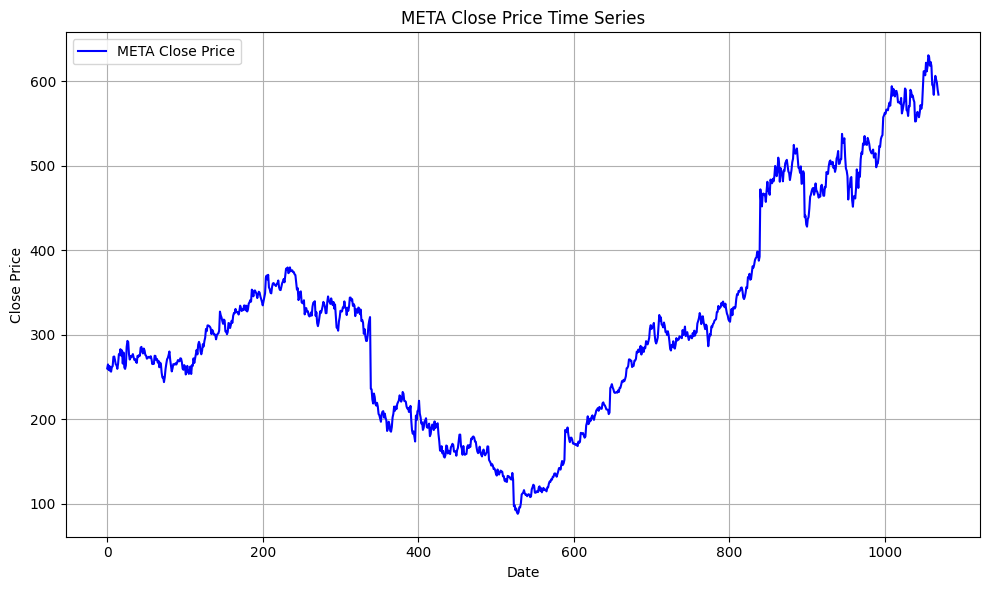

In [104]:
plt.figure(figsize=(10, 6))
plt.plot(merged.index, merged[('META Close')], label='META Close Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('META Close Price Time Series')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

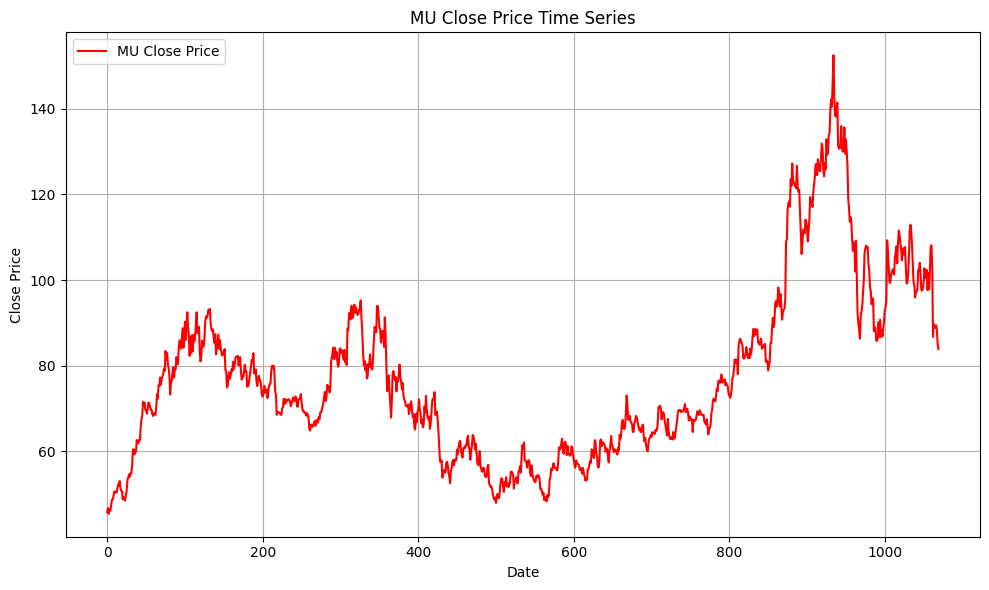

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(merged.index, merged[('MU Close')], label='MU Close Price', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('MU Close Price Time Series')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

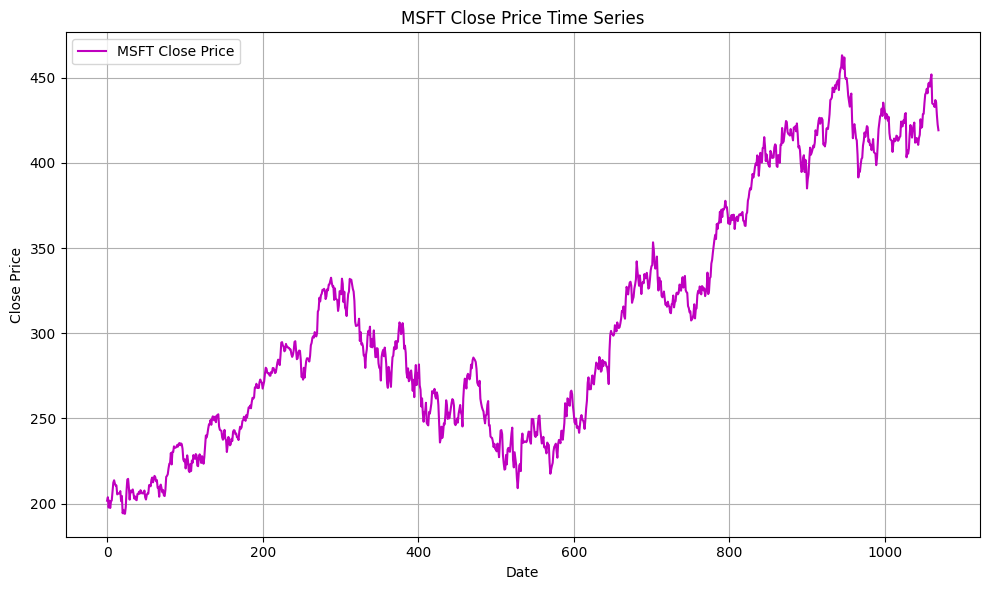

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(merged.index, merged[('MSFT Close')], label='MSFT Close Price', color='m')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('MSFT Close Price Time Series')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
PLTR['signal'] = 0
# fast > med & fast > slow
long_zone = (PLTR['sma10'] > PLTR['sma15']) & (PLTR['sma10'] > PLTR['sma20']) & (PLTR['sma15'] > PLTR['sma20'])
# fast < med & fast < slow
short_zone = (PLTR['sma10'] < PLTR['sma15']) & (PLTR['sma10'] < PLTR['sma20']) & (PLTR['sma15'] < PLTR['sma20'])

KeyError: 'sma10'

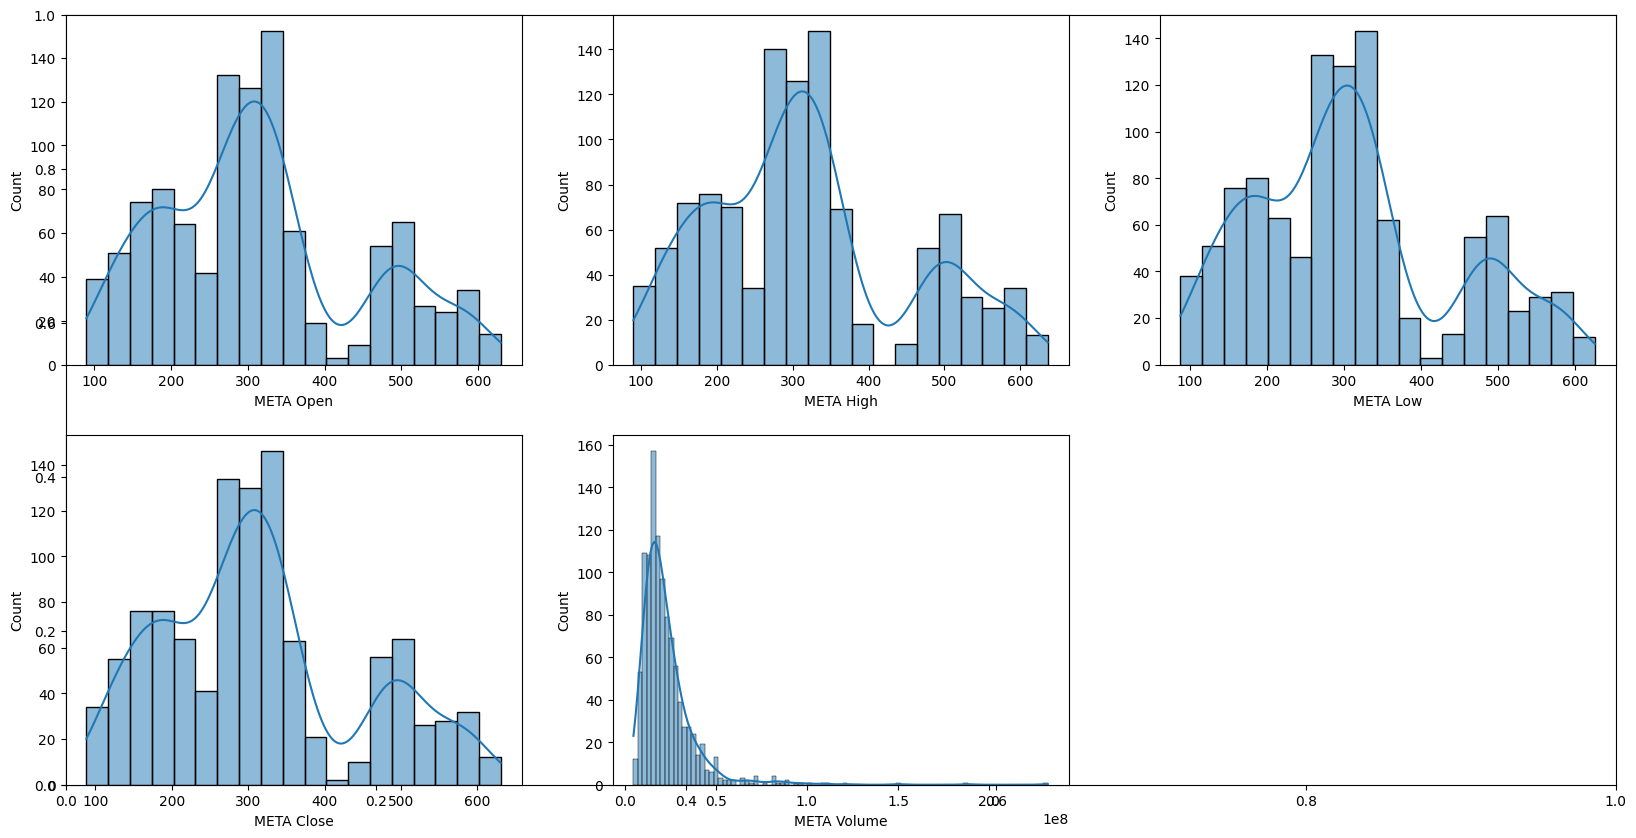

In [ ]:
features2 = ['META Open', 'META High', 'META Low', 'META Close', 'META Volume']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features2):
    plt.subplot(2,3,i+1)
    sns.histplot(META[col], kde=True)
plt.show()

In [ ]:
import statsmodels as sm
sm.__version__

'0.14.4'

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

#scaled volume and closing price columns with StandardScaler()